In [1]:
import sys
sys.path.append("../")
sys.path.append("../tasks/jrnnm/")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch

from matplotlib import colormaps as cm
from tasks.jrnnm.prior import parameters as bounds
from plot_utils import plot_pairgrid_with_groundtruth_jrnnm

PATH_EXPERIMENT = "../results/jrnnm/4d/"

N_train = 50000
lr = 1e-3
n_epochs = 1000
steps=1000

In [6]:
def load_samples_results(
    theta_gt,
    n_obs,
    steps=steps,
    n_train=N_train,
    n_epochs=n_epochs,
    save_path = PATH_EXPERIMENT,
    results=False
):
    result_path = save_path + f"n_train_{n_train}_n_epochs_{n_epochs}_lr_{lr}/" + f"euler_steps_{steps}/"
    filename = f"posterior_samples_{theta_gt.tolist()}_n_obs_{n_obs}.pkl"
    samples = torch.load(result_path + filename)
    if results:
        filename = f"results_dict_{theta_gt.tolist()}_n_obs_{n_obs}.pkl"
        results_dict = torch.load(result_path + filename)
        return samples, results_dict
    else:
        return samples

## Posterior estimation

### Varying g (n_obs=1)

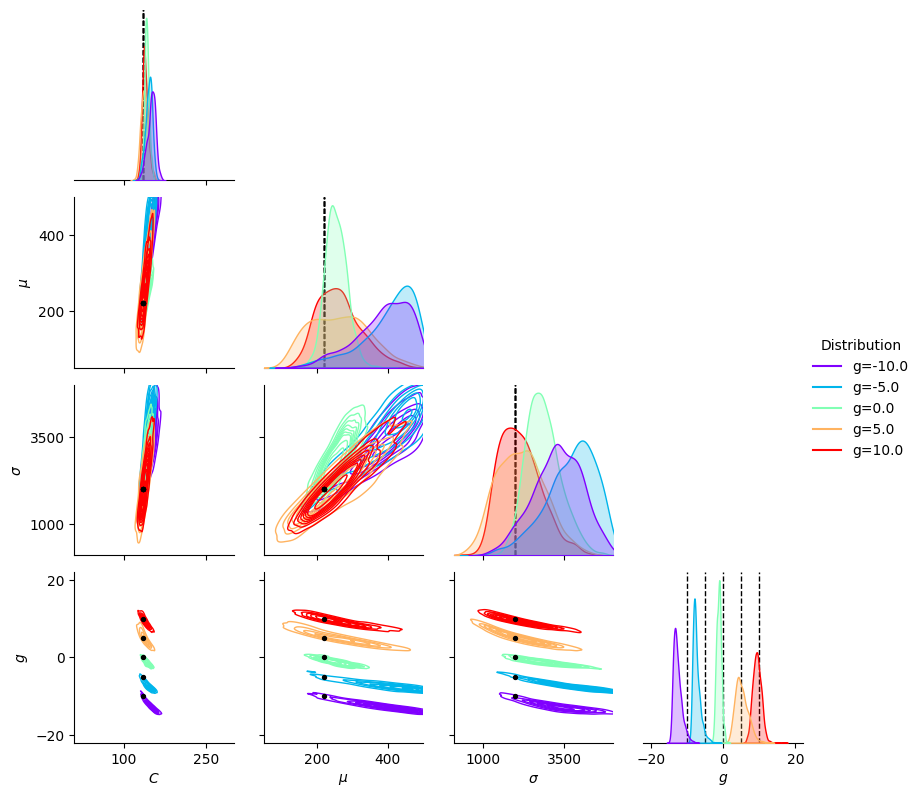

In [11]:
# NPSE samples for different observations
g_list = [-10.0, -5.0, 0.0, 5.0, 10.0]
theta_true_list = [torch.tensor([135.0, 220.0, 2000.0, g]) for g in g_list]

samples_npse = {}
for i, theta_true in enumerate(theta_true_list):
    samples_npse[i] = load_samples_results(theta_gt=theta_true, n_obs=1)

from matplotlib import colormaps as cmaps
plot_pairgrid_with_groundtruth_jrnnm(
    samples=[samples_npse[i] for i in range(len(samples_npse))],
    theta_gt=theta_true_list,
    labels=[f"g={g}" for g in g_list],
    colors=[cmaps.get_cmap("rainbow")(i) for i in np.linspace(0, 1, len(samples_npse))],
)
plt.show()

### Varying n_obs (tall posterior)

/data/parietal/store3/work/jlinhart/miniconda3/envs/diff4sbi/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/parietal/store3/work/jlinhart/miniconda3/envs/diff4sbi/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/parietal/store3/work/jlinhart/miniconda3/envs/diff4sbi/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to s

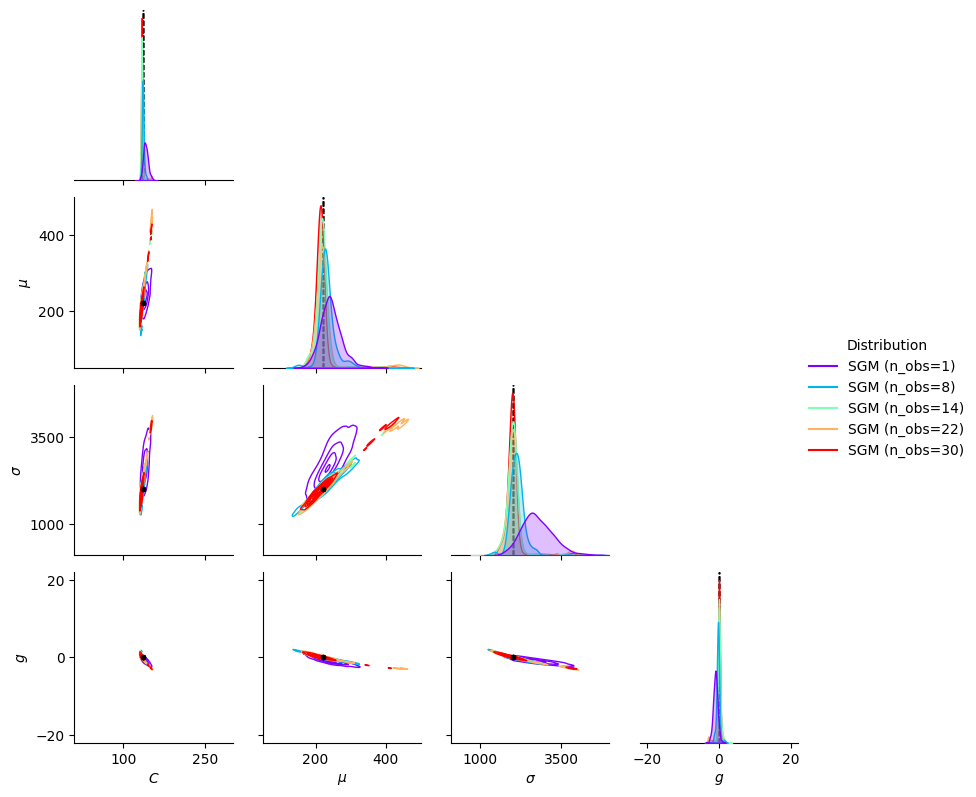

In [8]:
# g=0
theta_true = torch.tensor([135.0, 220.0, 2000.0, 0.0])
# n_list = [1, 10, 20, 50, 100]
n_list = [1,8,14,22,30]

samples_sgm = {}
results = {}
for i, n_obs in enumerate(n_list):
    samples_sgm[i] = load_samples_results(theta_gt=theta_true, n_obs=n_obs)

from matplotlib import colormaps as cmaps
plot_pairgrid_with_groundtruth_jrnnm(
    samples=[samples_sgm[i] for i in range(len(samples_sgm))],
    theta_gt=[theta_true] * len(samples_sgm),
    labels=[f"SGM (n_obs={n_obs})" for n_obs in n_list],
    colors=[cmaps.get_cmap("rainbow")(i) for i in np.linspace(0, 1, len(samples_sgm))],
)
plt.savefig("../results/jrnnm_samples_g_0.pdf")
plt.show()

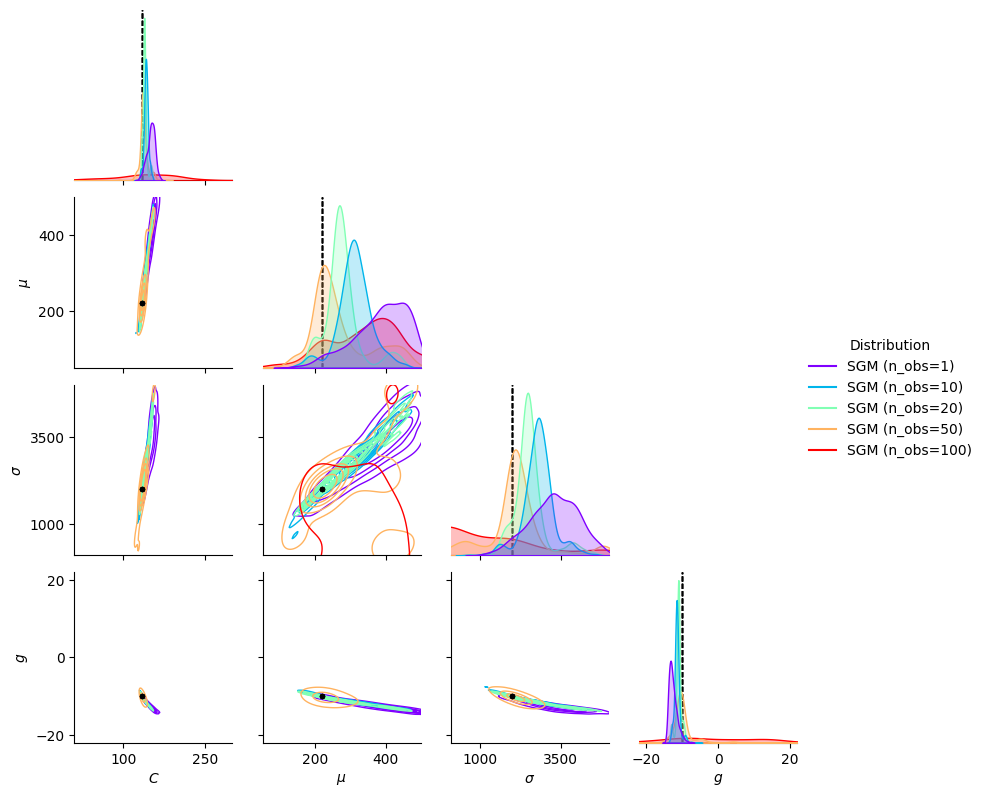

In [13]:
# g=-10
theta_true = torch.tensor([135.0, 220.0, 2000.0, -10.0])
n_list = [1, 10, 20, 50, 100]

samples_sgm = {}
results = {}
for i, n_obs in enumerate(n_list):
    samples_sgm[i] = load_samples_results(theta_gt=theta_true, n_obs=n_obs)

from matplotlib import colormaps as cmaps
plot_pairgrid_with_groundtruth_jrnnm(
    samples=[samples_sgm[i] for i in range(len(samples_sgm))],
    theta_gt=[theta_true] * len(samples_sgm),
    labels=[f"SGM (n_obs={n_obs})" for n_obs in n_list],
    colors=[cmaps.get_cmap("rainbow")(i) for i in np.linspace(0, 1, len(samples_sgm))],
)
plt.savefig("../results/jrnnm_samples_g_-10.pdf")
plt.show()